In [33]:
## In this section we will do some preparation for later analysis and will show and visualize some descriptive statistics of the data

In [1]:
## Importing all the necessary libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import urllib3
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [117]:
## loading the csv file which was created after scraping the IMDb website
imdb_top_movies = pd.read_csv("imdb_top_movies.csv")
imdb_top_movies = imdb_top_movies.astype({"year": int})

# quick clean
imdb_top_movies = imdb_top_movies.dropna( axis=0, how='all')

## removing all non-usd values in budget, as well as rows with empty budget values
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("EUR", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("BRL", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("JPY", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("FRF", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("INR", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("DEM", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("GBP", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("KRW", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("AUD", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("RUR", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("TRL", na=False)]
imdb_top_movies = imdb_top_movies[imdb_top_movies.budget.str.contains("", na=False)]


## removing the commas and the Dollar sign, transforming the butdget number to an int
imdb_top_movies["budget"] = imdb_top_movies["budget"].str.replace(",","", regex=True)
imdb_top_movies["budget"] = imdb_top_movies["budget"].str.replace("$","", regex=True).astype(int)


## cleaning the revenue data by removing Dollar signs, commas and droping rows with NaN values. Also transforing the values into floats
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].str.replace(',', '', regex=True)
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].str.replace('$', '', regex=True)
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].dropna()
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].astype(float)

In [118]:
len(imdb_top_movies)

250

In [119]:
imdb_top_movies

,Unnamed: 0,rank,IMDB_id,movie_name,year,director,starring,rating,number_of_reviews,genres,country,language,budget,box_office_revenue,runtime
0,0,1,111161,The Shawshank Redemption,1994,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",9.3,2395380,['Drama'],['USA'],['English'],"$25,000,000","$28,817,291",142
1,0,2,68646,The Godfather,1972,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan']",9.2,1659275,"['Crime', 'Drama']",['USA'],"['English', 'Italian', 'Latin']","$6,000,000","$246,120,986",175
2,0,3,71562,The Godfather: Part II,1974,Francis Ford Coppola,"['Al Pacino', 'Robert De Niro', 'Robert Duvall']",9.0,1153451,"['Crime', 'Drama']",['USA'],"['English', 'Italian', 'Spanish', 'Latin', 'Si...","$13,000,000","$48,035,783",202
3,0,4,468569,The Dark Knight,2008,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",9.0,2357059,"['Action', 'Crime', 'Drama', 'Thriller']","['USA', 'UK']","['English', 'Mandarin']","$185,000,000","$1,005,973,645",152
4,0,5,50083,12 Angry Men,1957,Sidney Lumet,"['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam']",9.0,706423,"['Crime', 'Drama']",['USA'],['English'],"$350,000",$955,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,246,169858,Neon Genesis Evangelion: The End of Evangelion,1997,Hideaki Anno,"['Megumi Ogata', 'Megumi Hayashibara', 'Yûko M...",8.1,41717,"['Animation', 'Action', 'Drama', 'Fantasy', 'S...",['Japan'],['Japanese'],NaN,NaN,87
246,0,247,66763,Anand,1971,Hrishikesh Mukherjee,"['Rajesh Khanna', 'Amitabh Bachchan', 'Sumita ...",8.3,31743,"['Drama', 'Musical']",['India'],['Hindi'],"INR3,000,000",NaN,122
247,0,248,56217,The Man Who Shot Liberty Valance,1962,John Ford,"['James Stewart', 'John Wayne', 'Vera Miles']",8.1,70294,"['Drama', 'Western']",['USA'],['English'],"$3,200,000",NaN,123
248,0,249,87884,"Paris, Texas",1984,Wim Wenders,"['Harry Dean Stanton', 'Nastassja Kinski', 'De...",8.1,94983,['Drama'],"['West Germany', 'France', 'UK', 'USA']","['English', 'Spanish']","GBP1,162,000","$2,206,121",145


In [104]:
imdb_top_movies[['currency', 'nominal']] = imdb_top_movies['budget'].str.split(r'\D+', 1, expand=True)

In [105]:
imdb_top_movies[['currency', 'nominal']]

,currency,nominal
0,,"25,000,000"
1,,"6,000,000"
2,,"13,000,000"
3,,"185,000,000"
4,,"350,000"
...,...,...
245,NaN,NaN
246,,"3,000,000"
247,,"3,200,000"
248,,"1,162,000"


In [ ]:
## add some general descriptive statistics here

In [39]:
## transforming the year into decades
imdb_top_movies["decades"] = (imdb_top_movies["year"]//10)*10
imdb_top_movies["decades"].sort_values().value_counts()

2010    46
2000    46
1990    41
1980    29
1950    24
1970    19
1960    19
1940    10
1920     7
1930     6
2020     3
Name: decades, dtype: int64

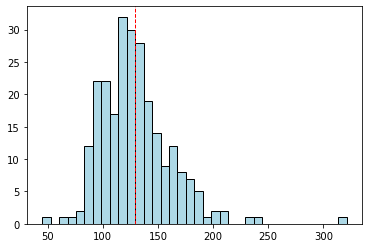

In [42]:
## have a look at different running times numerically but also visually

## make a histogram of the running time using matplot
plt.hist(imdb_top_movies["runtime"], color = 'lightblue', edgecolor = 'black',
         bins = int(180/5))
## add red line with the average runtime
plt.axvline(imdb_top_movies["runtime"].mean(), color='red', linestyle='dashed', linewidth=1)

In [43]:
## in a second step we would like to also define quantiles and then plot them
## define different quantilies 
q0 = imdb_top_movies["runtime"].quantile(0)
q25=imdb_top_movies["runtime"].quantile(0.25)
q50=imdb_top_movies["runtime"].quantile(0.5)
q75=imdb_top_movies["runtime"].quantile(0.75)
q100=imdb_top_movies["runtime"].quantile(1)

## filter each film based on its runtime and store it in a new value
first_quantile = imdb_top_movies[imdb_top_movies["runtime"] <= q25]
first_quantile_count = first_quantile["runtime"].count()

second_quantile = imdb_top_movies[(imdb_top_movies["runtime"] > q25) & (imdb_top_movies["runtime"] <= q50)]
second_quantile_count = second_quantile["runtime"].count()

third_quantile = imdb_top_movies[(imdb_top_movies["runtime"] > q50) & (imdb_top_movies["runtime"] <= q75)]
third_quantile_count = third_quantile["runtime"].count()

fourth_quantile = imdb_top_movies[imdb_top_movies["runtime"] > q75]
fourth_quantile_count = fourth_quantile["runtime"].count()

## calculate average running time of each quantile below and round results full numbers

q25_mean = round(sum(first_quantile["runtime"])/first_quantile_count)
q50_mean = round(sum(second_quantile["runtime"])/second_quantile_count)
q75_mean = round(sum(third_quantile["runtime"])/third_quantile_count)
q100_mean = round(sum(fourth_quantile["runtime"])/fourth_quantile_count)

## printing the quantiles and the average of each quantile below
print("There are",first_quantile_count,"movies with an average runtime of", q25_mean,"minutes in the first quantile (0-25%)")
print("There are",second_quantile_count,"movies with an average runtime of", q50_mean, "minutes in the second quantile (25-50%)")
print("There are",third_quantile_count,"movies with an average runtime of", q75_mean, "minutes in the third quantile (50-75%)")
print("There are",fourth_quantile_count,"movies with an average runtime of", q100_mean, "minutes in the fourth quantile (75-100%)")



There are 64 movies with an average runtime of 95 minutes in the first quantile (0-25%)
There are 63 movies with an average runtime of 118 minutes in the second quantile (25-50%)
There are 60 movies with an average runtime of 134 minutes in the third quantile (50-75%)
There are 63 movies with an average runtime of 171 minutes in the fourth quantile (75-100%)


In [121]:
type(imdb_top_movies["budget"])

pandas.core.series.Series

ValueError: Could not interpret value `number of appearances` for parameter `x`

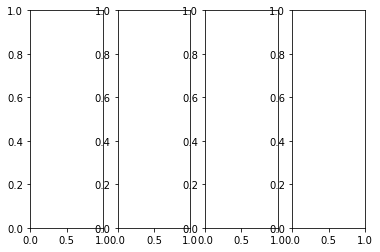